In [9]:
#import packages
import os
import pandas as pd

In [10]:
#display path
print(os.getcwd())

C:\Users\HP\Pictures\HRAnalytics


In [11]:
#set up new path
os.chdir('C:/Users/HP/Pictures/HRAnalytics')

In [ ]:
#read HR-Employee-Attrition.csv file
df= pd.read_csv('data/raw/HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)
df.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Hiển thị thông tin dữ liệu

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Mô tả các trường dữ liệu
- Age: Tuổi của nhân viên
- Attrition: tỷ lệ nhân viên nghỉ việc
- BusinessTravel: tần suất nhân viên đi công tác
- DailyRate: Tiền lương hàng ngày của nhân viên
- Department: Phòng ban nhân viên
- DistanceFromHome: Khoảng cách từ nhà đến văn phòng theo km
- Education: Trình độ của nhân viên (bị che)
- EducationField: Luồng giáo dục
- EmployeeCount: Số lượng nhân viên
- EmployeeNumber: số lượng nhân viên
- EnvironmentSatisfaction: Sự hài lòng về môi trường làm việc
- HourlyRate: mức lương theo giờ của nhân viên
- JobInvolvement: Mức độ tham gia công việc
- JobLevel: cấp độ của Job
- JobRole: vai trò công việc của nhân viên
- JobSatisfaction: nhân viên có hài lòng không?
- MaritalStatus: nhân viên đã kết hôn hay chưa
- MonthlyIncome: thu nhập của nhân viên
- MonthlyRate: mức lương hàng tháng của nhân viên
- NumCompaniesWorked: số công ty đã làm việc
- Over18: độ tuổi trên 18
- OverTime: nhân viên làm thêm giờ
- PercentSalaryHike: tăng lương
- PerformanceRating: tỷ lệ hiệu suất
- RelationshipSatisfaction: Sự hài lòng về mối quan hệ
- StandardHours: giờ làm việc tiêu chuẩn mỗi tuần
- StockOptionLevel: mức quyền chọn cổ phiếu của công ty
- TotalWorkingYears: tổng số năm làm việc
- TrainingTimesLastYear: thời gian đào tạo
- WorkLifeBalance: Cân bằng giữa công việc và cuộc sống
- YearsAtCompany: tổng số năm làm việc tại công ty hiện tại
- YearsInCurrentRole: tổng số năm giữ chức vụ hiện tại
- YearsSinceLastPromotion: số năm kể từ lần thăng chức gần nhất
- YearsWithCurrManager: Số năm làm việc dưới quyền quản lý hiện tại

Hiển thị một số thống kê mô tả


In [27]:
#display descriptive statistics
df.describe(include='int64')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Kiểm tra số lượng giá trị null ở mỗi trường 

In [19]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Kiểm tra giá trị trùng lặp

In [16]:
print(f"Số lượng dòng trùng lặp có trong data là {df.duplicated().sum()}") #Kiểm tra giá trị lặp trong dữ liệu

Số lượng dòng trùng lặp có trong data là 0


## Lựa chọn các trường dữ liệu định lượng để thực hiện kiểm tra outlier
Ở đây ta sẽ lựa chọn các trường dữ liệu định lượng để thực hiện kiểm tra outlier 

In [28]:
#Exclude object data
non_object_columns = df.select_dtypes(exclude='object').columns
print(non_object_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Các trường dữ liệu trên đây là các trường mà ta sẽ thực hiện việc xử lí outliers

In [21]:
def remove_outliers_iqr(df, columns, factor=1.5):
    df_clean = df.copy()
    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [29]:
df_no_outliers = remove_outliers_iqr(df, non_object_columns)
print(f"The size of dataframe before exclude outliers: {df.shape}")
print(f"The size of dataframe after exclude outliers: {df_no_outliers.shape}")


The size of dataframe before exclude outliers: (1470, 35)
The size of dataframe after exclude outliers: (699, 35)


In [31]:
print(f"The proportion of data that is outlier accounted for {(1 - df_no_outliers.shape[0]/df.shape[0])*100}%")

The proportion of data that is outlier accounted for 52.44897959183674%


Đánh giá: Sau khi xử lý bộ dữ liệu và giả định loại bỏ các giá trị outlier, ta thấy dữ liệu outlier chiếm hơn 50% bộ dữ liệu, ta thực hiện visualize để quan sát xem dữ liệu ở trường nào có outlier bằng cách sử dụng biểu đồ boxplot

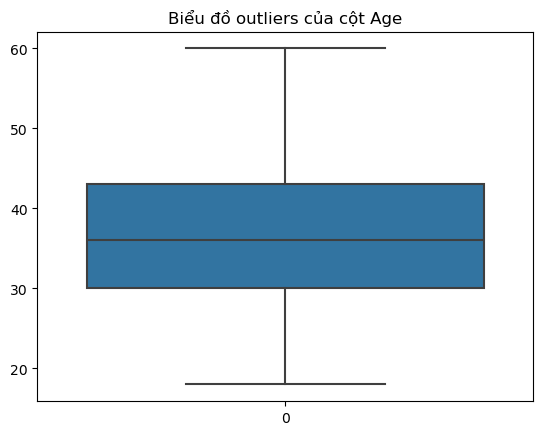

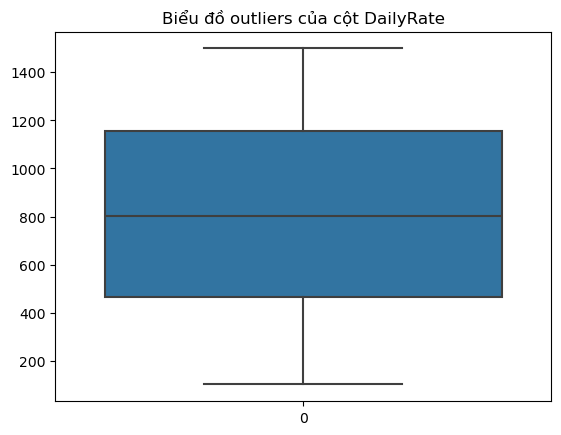

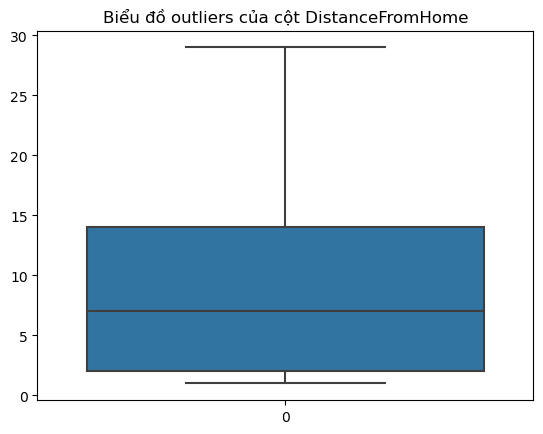

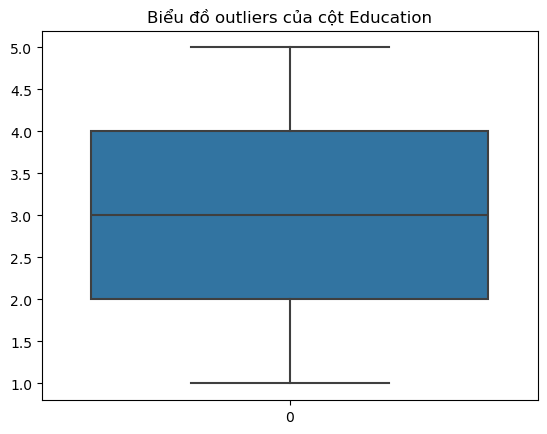

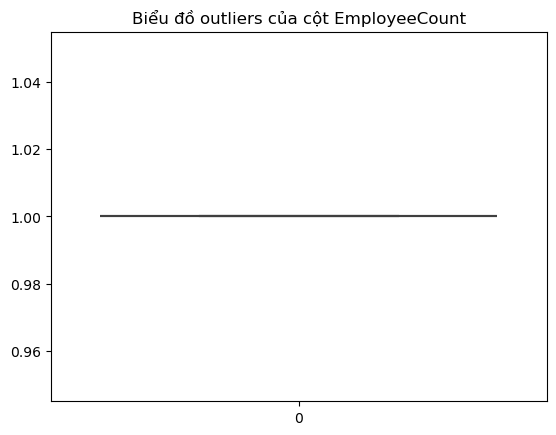

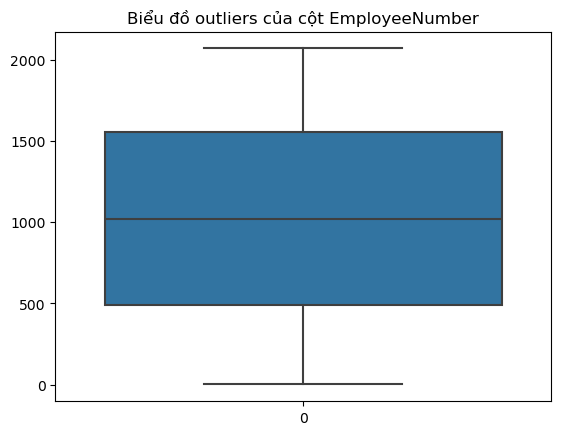

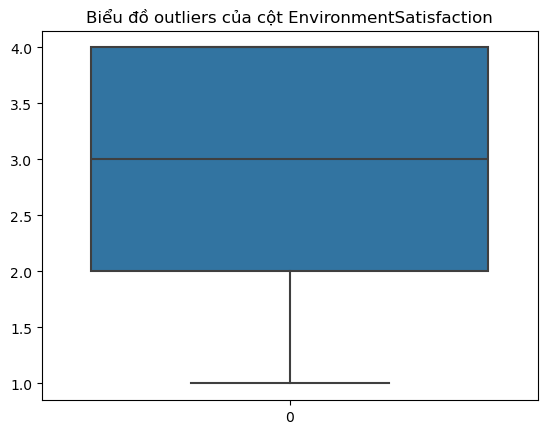

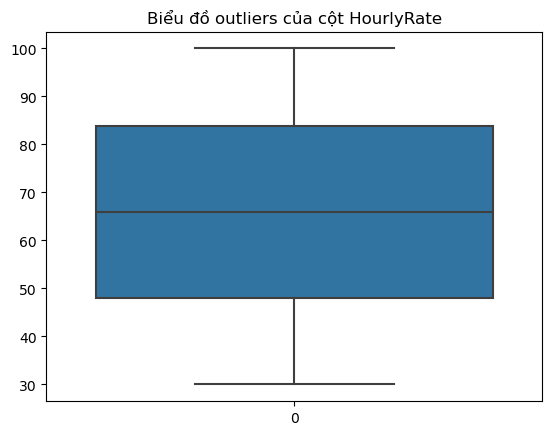

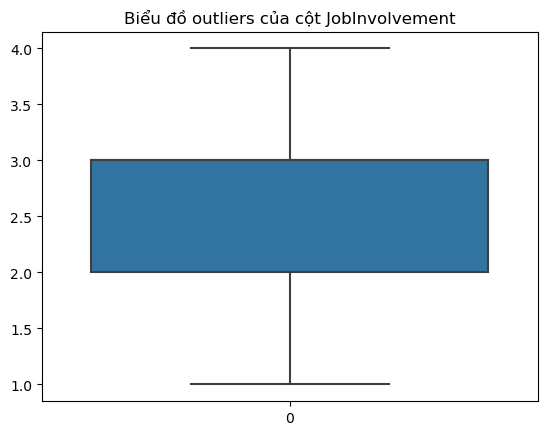

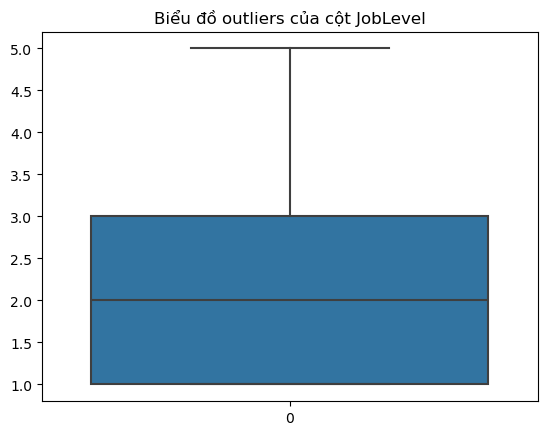

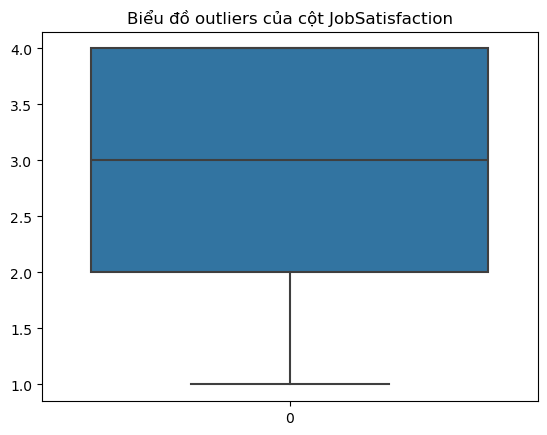

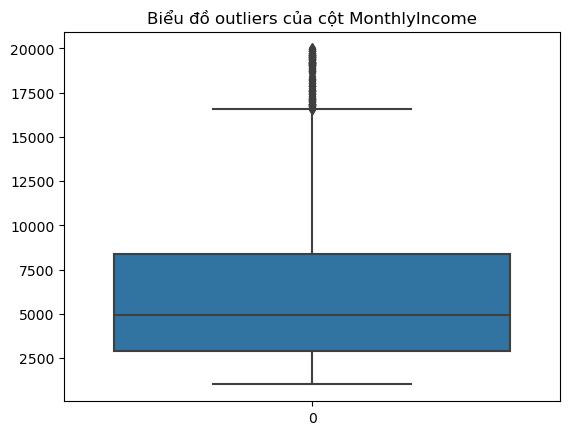

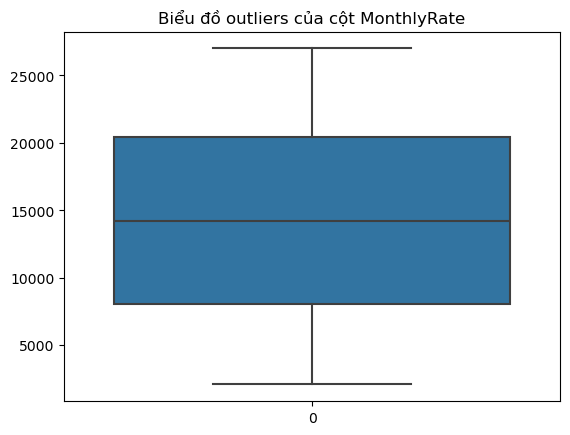

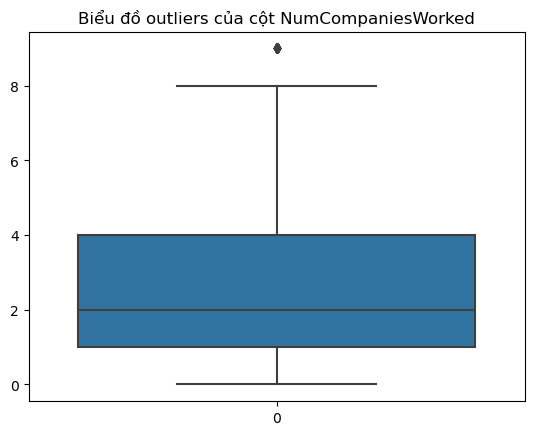

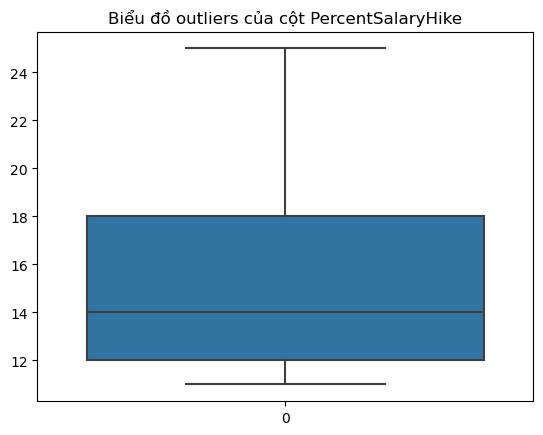

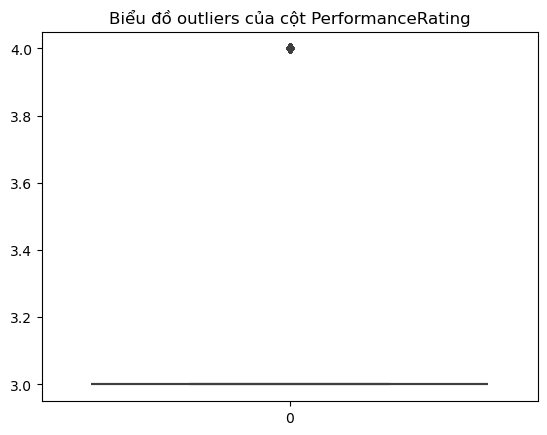

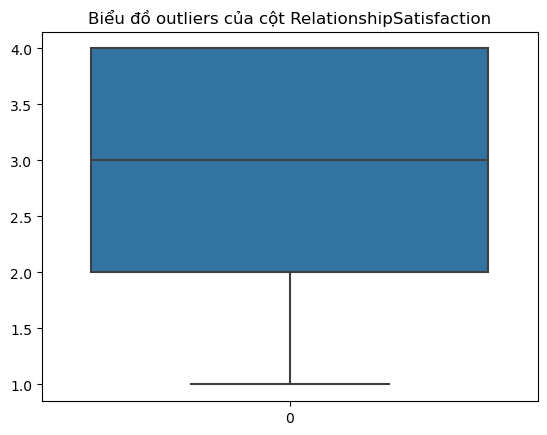

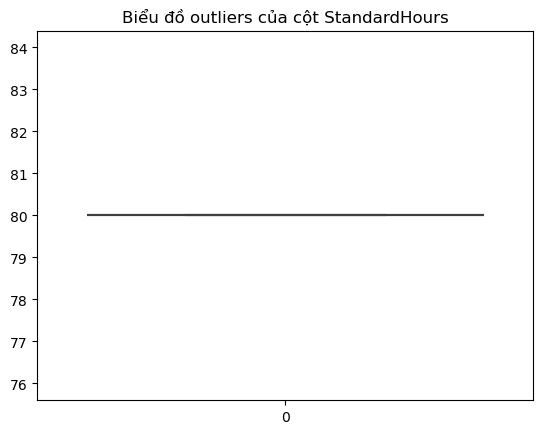

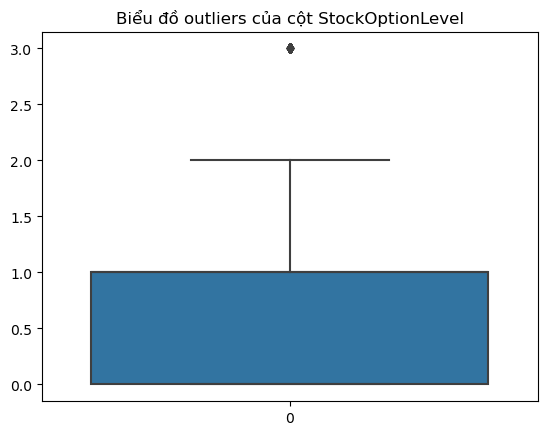

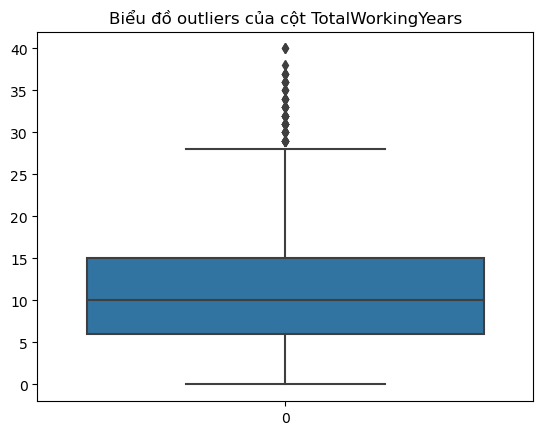

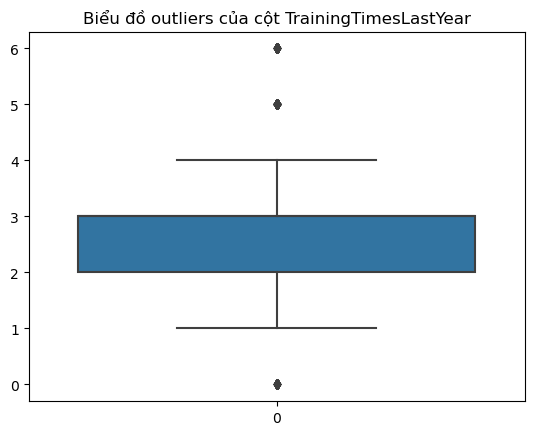

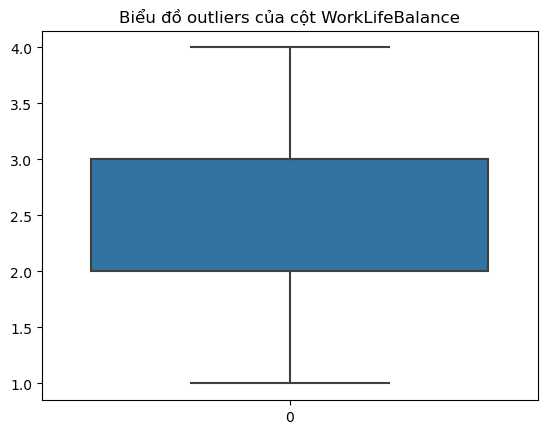

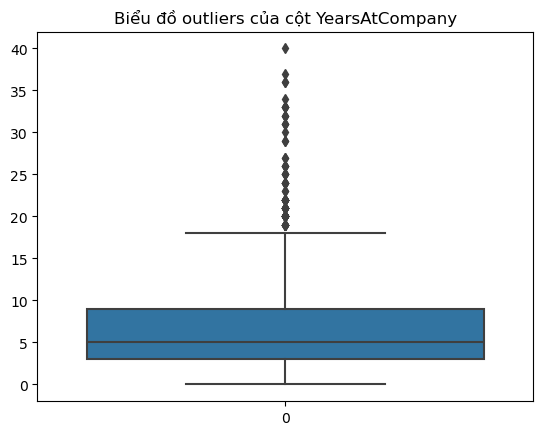

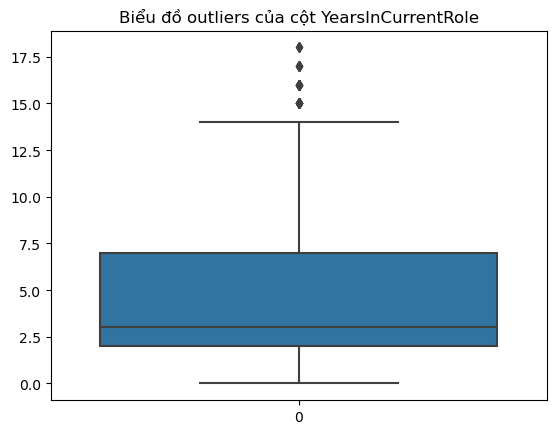

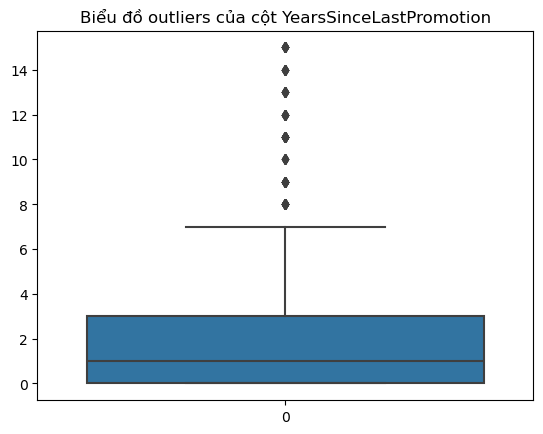

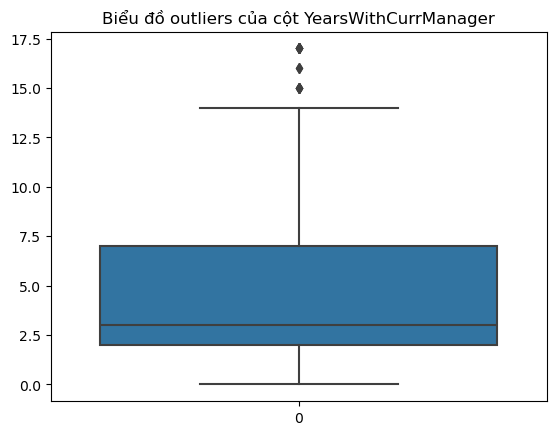

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
col = []
def visualize(col):
  sns.boxplot(df[col])
  plt.title(f"Biểu đồ outliers của cột {col}")
  plt.show()

for col in non_object_columns:
  visualize(col)

Nhận xét từng biểu đồ:
- Age:
  + Phân bố khá đều, không có outlier rõ rệt.
  + Dao động từ khoảng 18 đến 60 tuổi.
  + Phân bố hơi nghiêng về nhóm tuổi 30 đến 40.
- DailyRate:
  + Có nhiều outliers ở cả hai phía (cao và thấp).
  + Phân bố rộng, lương theo ngày dao động mạnh.
- DistanceFromHome:
  + Có một vài outliers phía trên (> 25km).
  + Phần lớn nhân viên sống cách nơi làm < 20km.
- Education:
  + Giá trị từ 1 đến 5, không có outliers.
- EmployeeCount:
  + Chỉ có một giá trị (1) cho toàn bộ.
- EmployeeNumber:
  + Là ID nhân viên, không mang ý nghĩa số học
- EnvirontmentSatisfaction:
  + Giá trị 1 đến 4, không có outliers.
- HourlyRate:
  + Có vài outliers nhẹ phía trên và dưới.
  + Lương theo giờ phân bố không đều, nhưng không có bất thường nghiêm trọng.
- JobInvolvement:
  + Giá trị 1 đến 4, không có outliers.
  + Là thang đo mức độ tham gia
- JobLevel:
  + Phân bố hợp lý trong khoảng 1 đến 5.
  + Không có outliers.
- JobSatisfaction:
  + Giá trị từ 1 đến 4, không có outlier.
  + Thang đo mức độ hài lòng trong công việc
- MonthlyIncome:
  + Có rất nhiều outliers ở phía cao.
  + Một số nhân viên có thu nhập > 20.000 trong khi phần lớn < 10.000.
- MonthlyRate:
  + Nhiều outliers ở phía cao.
  + Có thể do một số nhân viên nhận lương cao hoặc phụ cấp lớn.
- NumCompaniesWorked:
  + Có outliers (giá trị lớn như 9).
  + Đa phần nhân viên từng làm < 5 công ty.
- PercentSalaryHike:
  + Một vài điểm outlier (> 20%).
  + Mức tăng lương thường từ 10 đến 15%.
- PerformanceRating:
  + Hầu như chỉ có 2 giá trị (3, 4), không có outlier.
- RelationshipSatisfaction:
  + Giá trị từ 1 đến 4, không có outlier.
- StandardHours:
  Giá trị luôn là 80.
- StockOptionLevel:
  + Giá trị từ 0 đến 3, không có outlier.
- TotalWorkingYears:
  + Có vài outliers > 35 đến 40 năm.
  + Phần lớn nhân viên có kinh nghiệm < 20 năm.
- TrainingTimesLastYear:
  + Giá trị 0 đến 6, có phân bố đều.
- WorkLifeBalance:
  + Giá trị 1 đến 4, không có outliers.
- YearsAtCompany:
  + Có outliers > 30 năm.
  + Đa số làm dưới 10 năm
- YearsInCurrentRole:
  + Phân bố hợp lý, có vài outliers ở giá trị cao.
- YearsSinceLastPromotion:
  + Có outliers rõ (15 năm không được thăng chức).
- YearsWithCurrManager:
  + Có vài giá trị lớn hơn phần còn lại (> 15 năm).



- Đánh giá chung: Việc có sự xuất hiện dữ liệu outliers trong bộ dữ liệu thuộc lĩnh vực này nguyên nhân là do đặc thù của các công ty, giả sử ở trường MonthlyIncome, có rất nhiều giá trị outliers vì những người này nắm giữ những vị trí quan trọng trong công ty, và mức lương của họ sẽ có sự chênh lệch đối với nhân viên trong công ty, nên mặt bằng chung các giá trị này thường trội hơn giá trị trung bình. <br>
- Đề xuất: Ta sẽ không loại bỏ các giá trị outliers, và ta sẽ thực hiện đánh giá ở bước Data Analysis để đưa ra kết luận

## Đối với các biến định tính, ta sẽ thực hiện chuyển đổi các giá trị phân loại và thực hiện mã hoá thành các dạng số nguyên 

In [41]:
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include='object').columns
print(object_columns)
object_df = df[object_columns]

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [ ]:
#Thực hiện encoder các trường dữ liệu định tính 
for col in object_columns:
    le = LabelEncoder()
    object_df[col] = le.fit_transform(object_df[col])  
df_le = df.copy()
for col in object_columns:
    df_le[col] = object_df[col]

C:\Users\HP\AppData\Local\Temp\ipykernel_16468\281171598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df[col] = le.fit_transform(object_df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_16468\281171598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df[col] = le.fit_transform(object_df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_16468\281171598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [49]:
df_le.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


Nhận xét: Việc chuyển đổi dữ liệu định tính sang định lượng nhằm mục đích đưa dữ liệu vào model vào trong tính toán dễ dàng hơn.

## Tiến hành thực hiện chia tập train-test dữ liệu

In [51]:
from sklearn.model_selection import train_test_split
X = df_le.drop('Attrition', axis=1)
y = df_le['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
# from sklearn.model_selection import train_test_split
# X = df.drop('Attrition', axis=1)
# y = df['Attrition']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [ ]:
train_df_update = pd.concat([X_train, y_train], axis=1)
test_df_update = pd.concat([X_test, y_test], axis=1)


train_df_update.to_csv('C:/Users/HP/Pictures/HRAnalytics/data/processed/train_data_update.csv', index=False)
test_df_update.to_csv('C:/Users/HP/Pictures/HRAnalytics/data/processed/test_data_update.csv', index=False)

In [ ]:
# train_df = pd.concat([X_train, y_train], axis=1)
# test_df = pd.concat([X_test, y_test], axis=1)

# # Lưu ra CSV
# train_df.to_csv('C:/Users/HP/Pictures/HRAnalytics/data/processed/train_data.csv', index=False)
# test_df.to_csv('C:/Users/HP/Pictures/HRAnalytics/data/processed/test_data.csv', index=False)